In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from imp import reload
import sys
import scipy.special as sp

sys.path.append('../')
import mg_si
from mg_si import plot as mplt
reload(mg_si)
reload(mg_si.planet)
reload(mg_si.core)
reload(mplt)
import dill

In [2]:
pl = mg_si.planet.Custom()

In [43]:
times = np.linspace(0,100e6*365.25*24*3600,1000)
# times = np.linspace(0,4568e6*365.25*24*3600,30000)
T_low = 5000.
T_high = 6500.
T_cmb0s = np.linspace(T_low, T_high, int((T_high-T_low)/50+1))
dTs554 = []
dT = 2200.
for T_cmb0 in T_cmb0s:
    worked=False
    while(worked==False):
        try:
            T_um0 = T_cmb0-dT

            pl.reactions._set_layer_thickness(300)
            x0 = [T_cmb0, T_um0]

            ## Initial Core State
            X_Mg_0 = 0.05
            X_Si_0 = 0.05
            X_O_0 = 0.04
            Moles_0 = pl.reactions.compute_Moles_0(X_Mg_0, X_Si_0, X_O_0, T_cmb0)

            ### background mantle state
            fraction_MgFe_b = 0.8
            X_MgFeO_b = 0.16
            X_SiO2_b = 0.01

            Mm_b = pl.reactions.mantle.compute_Mm_b(fraction_MgFe_b, X_MgFeO_b, X_SiO2_b)

            pl.params.reactions.Moles_0 = Moles_0
            pl.params.reactions.Mm_b = Mm_b
            pl.reactions._set_overturn_time(800)

            x0 = x0+Moles_0

            # nu_present = 10**21/pl.params.mantle.rho #[m^2/s]
            nu_present = 10**21/pl.params.mantle.rho #[m^2/s]
            T_present = 1350 # [K]
            nu_old =  nu_present/1e3
            T_old = T_um0
            A,nu0 = pl.mantle_layer.find_arrenhius_params(nu_present, T_present, nu_old, T_old, set_values=True)

            solution = pl.integrate(times, x0)
            dTs554.append(dT)
            worked = True
        except:
            dT += 25.
            

In [52]:
def get_dT(T_cmb):
    m = 0.41431452
    b = 182.04637097
    return T_cmb*m+b

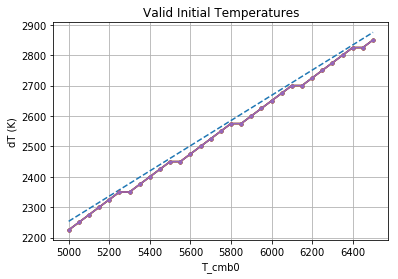

In [54]:

pf = np.polyfit(T_cmb0s,np.array(dTs551)+20,1)
plt.plot(T_cmb0s, np.polyval(pf, T_cmb0s), '--')
plt.plot(T_cmb0s, dTs501, '.-')
plt.plot(T_cmb0s, dTs551, '.-')
plt.plot(T_cmb0s, dTs554, '.-')
plt.plot(T_cmb0s, dTs, '.-')
# plt.plot(T_cmb0s, get_dT(T_cmb0s),'-')
plt.title('Valid Initial Temperatures')
plt.ylabel('dT (K)')
plt.xlabel('T_cmb0')
plt.grid()
plt.savefig('dTfits.png')
dill.dump((T_cmb0s, dTs, pf), open('dTfits.m','wb'))

In [169]:
mplt.temperature(pl, times, solution, savename='temperature.png')

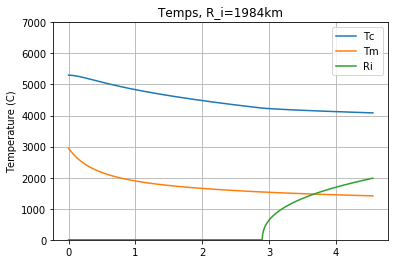

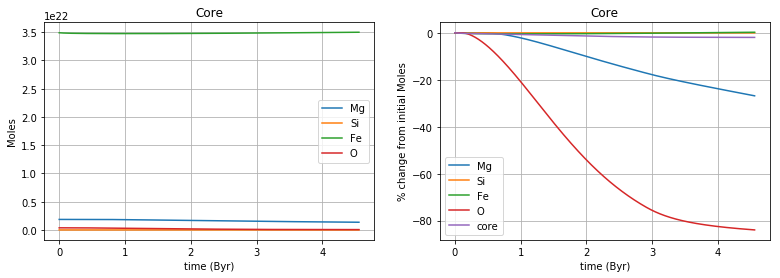

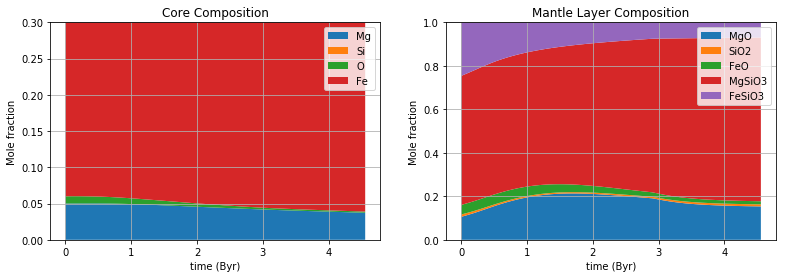

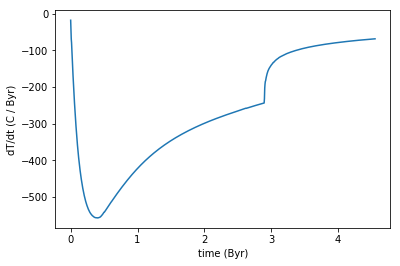

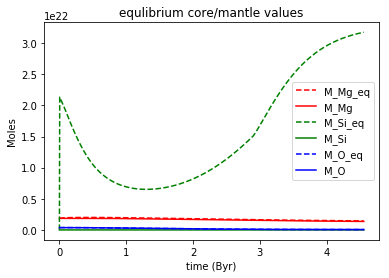

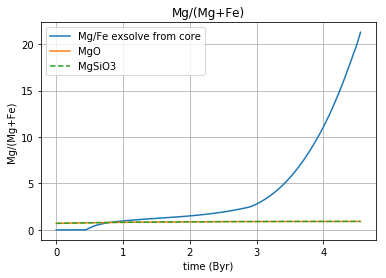

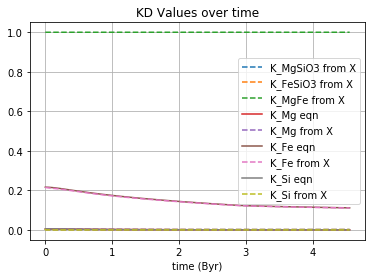

In [171]:
mplt.coremoles(pl, times, solution, savename='coremoles.png')
mplt.composition(pl, times, solution, savename='composition.png')
mplt.dTdt(pl, times, solution, savename=None)
mplt.MgSiOequilibrium(pl, times, solution, savename=None)
mplt.MgFefraction(pl, times, solution, savename=None)
mplt.K_vals(pl, times, solution, savename=None)
#plt.close('all')

In [132]:
t_N,all_parameters = pl.core_layer.compute_all_parameters(times, solution)

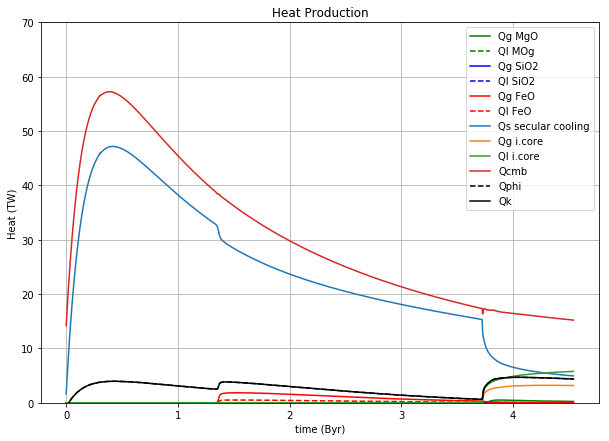

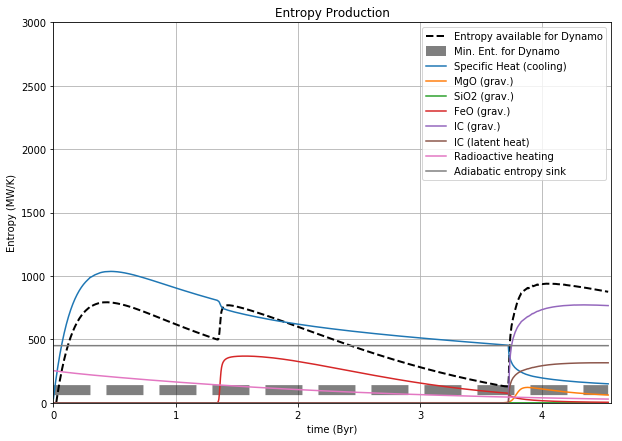

In [133]:
mplt.Q_all(pl, t_N, all_parameters, savename='HeatFlow.png')
mplt.E_all(pl, t_N, all_parameters, savename='Entropy.png')


In [ ]:
M_c, M_m = pl.reactions.unwrap_Moles(Moles_0, return_sum=True, split_coremantle=True)

X_Mg = M_c[0] / M_c[4]
X_Si = M_c[1] / M_c[4]
X_Fe = M_c[2] / M_c[4]
X_O = M_c[3] / M_c[4]

X_MgO = M_m[0] / M_m[5]
X_FeO = M_m[1]/ M_m[5]
X_SiO2 = M_m[2]/ M_m[5]
X_MgSiO3 = M_m[3] / M_m[5]
X_FeSiO3 = M_m[4] / M_m[5]

K1 = X_MgO * X_SiO2 / X_MgSiO3
K2 = X_FeO * X_SiO2 / X_FeSiO3
K3 = X_FeO * X_MgSiO3 / (X_MgO * X_FeSiO3)
K4 = X_Mg * X_O / X_MgO
K5 = X_Fe * X_O / X_FeO
K6 = X_Si * X_O ** 2 / X_SiO2

In [ ]:
print(X_Mg, X_Si, X_Fe, X_O)

In [ ]:
print(X_MgO, X_SiO2, X_FeO, X_MgSiO3, X_FeSiO3)

In [ ]:
print(X_MgO/X_FeO, X_MgSiO3/X_FeSiO3)

In [ ]:
print(K1,K2,K3)

In [ ]:
Moles_0

In [ ]:
print(K1, K2, K3)

In [ ]:
Cyr2s = 365.25*24*3600

time = np.logspace(3,9.61)*Cyr2s
tm = (800e6*Cyr2s - 50e6*Cyr2s) * (1. - np.exp(-0.5*time /( Cyr2s*1e9))) + 50e6*Cyr2s/10.

plt.semilogy(time/Cyr2s,tm/800e6/Cyr2s)

# Compute Moles 0

In [ ]:
T_cmb = T_cmb0
X_Mg_0 = 0.025
X_Si_0 = 0.025
X_O_0 = 0.15

X_Fe = 1 - X_Mg - X_Si - X_O
X_c = np.array([X_Mg, X_Si, X_Fe, X_O])
K4, _ = pl.reactions.func_KD_MgO_val(T_cmb)
K5, _ = pl.reactions.func_KD_FeO_val(T_cmb)
K6, _ = pl.reactions.func_KD_SiO2_val(X_Si, X_O, T_cmb)
X_MgO = X_Mg * X_O / K4
X_FeO = X_Fe * X_O / K5
X_SiO2 = X_Si * X_O ** 2 / K6
X_FeSiO3 = (1 - X_MgO - X_FeO - X_SiO2) / (1 + X_MgO / X_FeO)
X_MgSiO3 = 1 - X_MgO - X_FeO - X_SiO2 - X_FeSiO3
X_m = np.array([X_MgO, X_SiO2, X_FeO, X_MgSiO3, X_FeSiO3])

In [ ]:
print(X_MgO/X_FeO, X_MgSiO3/X_FeSiO3)

In [ ]:
pl.reactions.mantle.species

In [ ]:
Mt = pl.reactions.mantle.Xwtot2Mtot(X_m, 1)
pl.reactions.mantle.XMtot2wtot(X_m, Mt)

In [ ]:
M_m = pl.reactions.mantle.X2M(X_m, wt_tot=pl.params.reactions.mass_l_0)

In [ ]:
X_MgO = M_m[0] / np.sum(M_m)
X_SiO2 = M_m[1]/ np.sum(M_m)
X_FeO = M_m[2]/ np.sum(M_m)
X_MgSiO3 = M_m[3] / np.sum(M_m)
X_FeSiO3 = M_m[4] / np.sum(M_m)


In [ ]:
print(X_MgO/X_FeO, X_MgSiO3/X_FeSiO3)

In [ ]:
Moles_0 = pl.reactions.compute_Moles_0(X_Mg_0, X_Si_0, X_O_0, T_cmb0)

M_c, M_m = pl.reactions.unwrap_Moles(Moles_0, return_sum=True, split_coremantle=True)

In [ ]:
X_Mg = M_c[0] / M_c[4]
X_Si = M_c[1] / M_c[4]
X_Fe = M_c[2] / M_c[4]
X_O = M_c[3] / M_c[4]

X_MgO = M_m[0] / M_m[5]
X_FeO = M_m[1]/ M_m[5]
X_SiO2 = M_m[2]/ M_m[5]
X_MgSiO3 = M_m[3] / M_m[5]
X_FeSiO3 = M_m[4] / M_m[5]

K1 = X_MgO * X_SiO2 / X_MgSiO3
K2 = X_FeO * X_SiO2 / X_FeSiO3
K3 = X_FeO * X_MgSiO3 / (X_MgO * X_FeSiO3)
K4 = X_Mg * X_O / X_MgO
K5 = X_Fe * X_O / X_FeO
K6 = X_Si * X_O ** 2 / X_SiO2

In [ ]:
print(X_MgO/X_FeO, X_MgSiO3/X_FeSiO3)